## Importing the Data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import squarify
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter

sales_data = pd.read_csv(r'sales_data_sample.csv', encoding='latin1')

# Convert ORDERDATE to datetime format for time series analysis
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'], errors='coerce')

sales_data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
sales_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

## 1. Sales Growth and Trends Over Time (Line Chart)

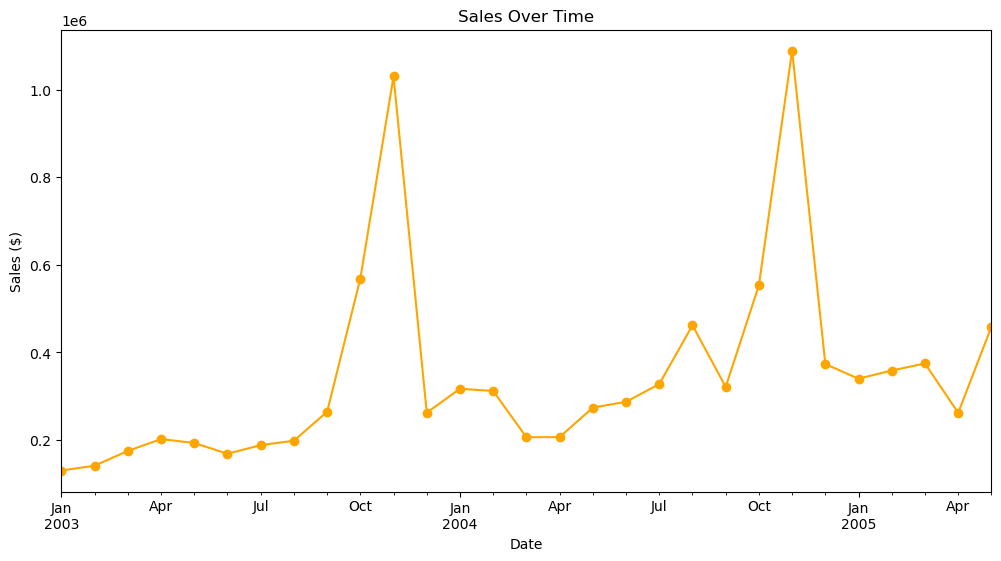

In [5]:
plt.figure(figsize=(12, 6))
sales_over_time = sales_data.groupby(sales_data['ORDERDATE'].dt.to_period('M')).sum(numeric_only=True)['SALES']
sales_over_time.plot(kind='line', marker='o', title='Sales Over Time', xlabel='Date', ylabel='Sales ($)', color='orange')
plt.show()

## 2. Changes in Sales by Product Line (Waterfall Chart)


In [6]:
waterfall_data = sales_data.groupby('PRODUCTLINE').sum(numeric_only=True)['SALES'].reset_index()
waterfall_data = waterfall_data.sort_values(by='SALES', ascending=False)
fig = go.Figure(go.Waterfall(
    x=waterfall_data['PRODUCTLINE'],
    y=waterfall_data['SALES'],
    measure=['relative'] * len(waterfall_data),
    connector=dict(line=dict(color='rgb(63, 63, 63)')),
))
fig.update_layout(title='Changes in Sales by Product Line', xaxis_title='Product Line', yaxis_title='Sales')
fig.show()


## 3. Sales Distribution Based on Deal Size Categories (Pie Chart)

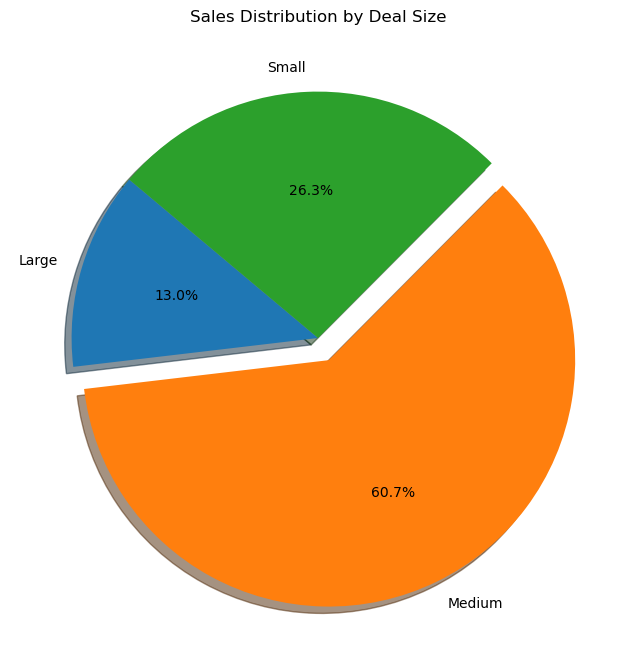

In [7]:
plt.figure(figsize=(8, 8))
explode = (0, 0.1, 0)
deal_size_sales = sales_data.groupby('DEALSIZE').sum(numeric_only=True)['SALES']
deal_size_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140,  explode=explode, shadow=True, title='Sales Distribution by Deal Size')
plt.ylabel('')
plt.show()

## 4. Sales by Product Line and Deal Size (Mekko Chart - Marimekko Chart) 

In [12]:
mekko_data = sales_data.groupby(['PRODUCTLINE', 'DEALSIZE']).sum(numeric_only=True)['SALES'].reset_index()
fig = px.treemap(mekko_data, path=['PRODUCTLINE', 'DEALSIZE'], values='SALES', title='Sales by Product Line and Deal Size')
fig.show()

## 5.  The relationship between the order quantity and the product's selling price (Scatter Plot)

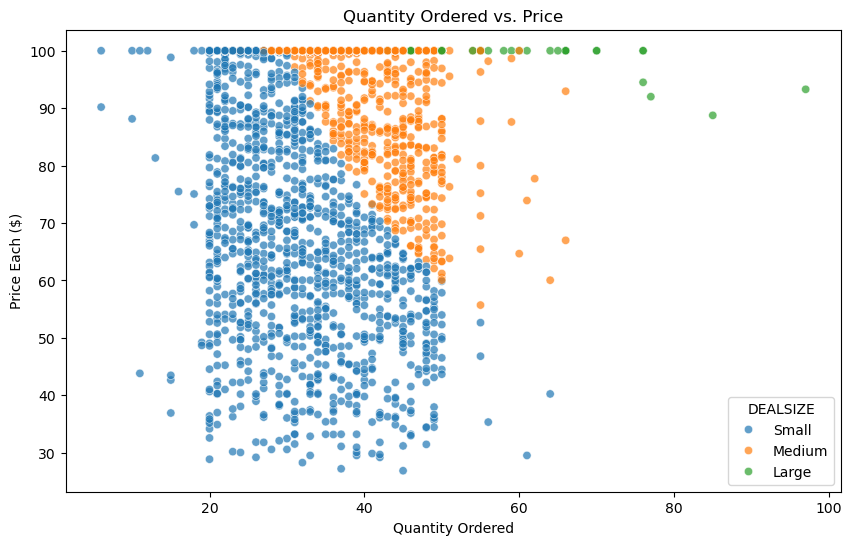

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_data, x='QUANTITYORDERED', y='PRICEEACH', hue='DEALSIZE', alpha=0.7)
plt.title('Quantity Ordered vs. Price')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each ($)')
plt.show()

## 6. Total sales by country (Treemap)

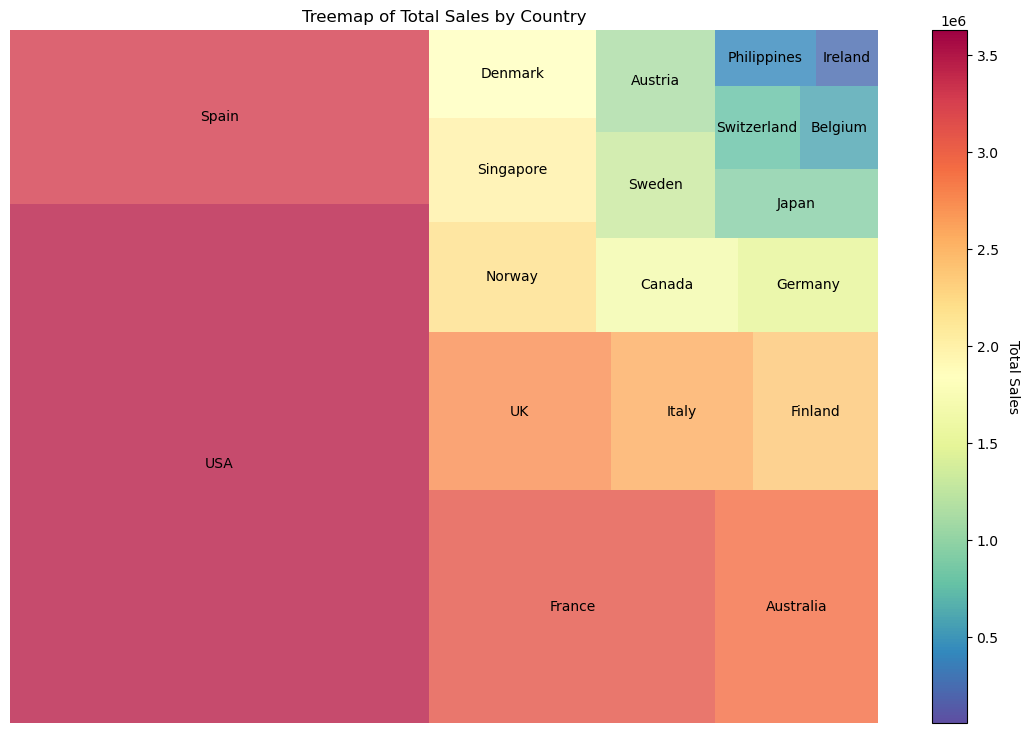

In [10]:
# Group by country and sum sales
sales_by_country = sales_data.groupby('COUNTRY')['SALES'].sum().reset_index()

# Sort sales for better visualization
sales_by_country = sales_by_country.sort_values('SALES', ascending=False)

# Create a color palette for the treemap
colors = sns.color_palette("Spectral", len(sales_by_country))  # Keep the original color map for the treemap

# Create a figure and axis for treemap
fig, ax = plt.subplots(figsize=(14, 9))

# Create the treemap
squarify.plot(sizes=sales_by_country['SALES'], label=sales_by_country['COUNTRY'], alpha=0.8, color=colors, ax=ax)
plt.title('Treemap of Total Sales by Country')
plt.axis('off')

# Create a reversed colorbar
norm = mpl.colors.Normalize(vmin=sales_by_country['SALES'].min(), vmax=sales_by_country['SALES'].max())
sm = plt.cm.ScalarMappable(cmap="Spectral_r", norm=norm)  # Reverse the color map for the colorbar
sm.set_array([])

# Add the reversed colorbar to the right of the treemap
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Total Sales', rotation=270, labelpad=15)

## 7. Stacked Bar Chart of Order Status by Year (Bar chart)

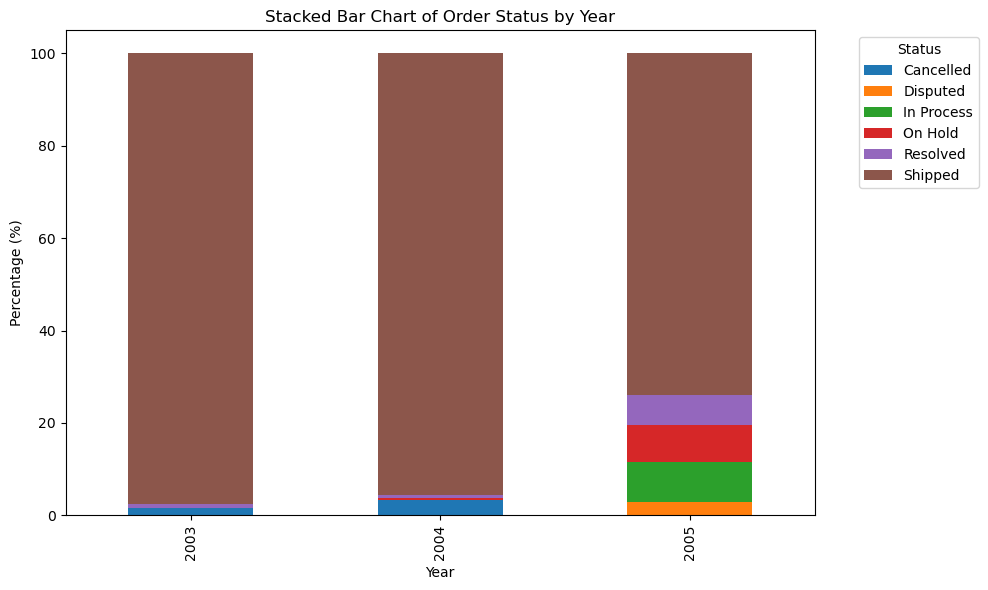

In [11]:
# Assuming 'data' is already defined and contains the necessary data
status_by_year = sales_data.groupby(['YEAR_ID', 'STATUS']).size().unstack()
status_by_year_percentage = status_by_year.div(status_by_year.sum(axis=1), axis=0) * 100

# Create the stacked bar plot
status_by_year_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set title and labels
plt.title('Stacked Bar Chart of Order Status by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Move the legend outside the plot
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()